<a href="https://colab.research.google.com/github/JSJeong-me/Introduction-to-Data-Analysis-with-DL-and-ML/blob/main/3-DL/22-VGG16-binary-classUntitled38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [2]:
# 모델 불러오기, 상위 계층 제외
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

In [6]:
# 모델 구조를 변경하지 않고 기존 가중치는 그대로 유지
for layer in base_model.layers:
    layer.trainable = False

In [7]:
# 새로운 계층 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)  # 특징 맵을 평균하여 하나의 벡터로 만듦
x = Dense(1024, activation='relu')(x)  # 추가적인 밀집층
predictions = Dense(1, activation='sigmoid')(x)  # 최종 이진 분류 계층

In [9]:
predictions.shape

TensorShape([None, 1])

In [10]:
# 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

In [12]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 구조 출력
# model.summary()


In [13]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# 이미지 파일을 불러오기
img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # 모델에 맞는 이미지 크기로 조정

In [ ]:
type(img)

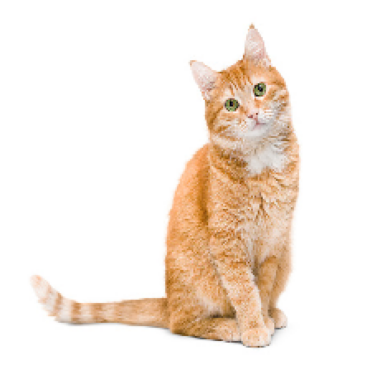

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 이미지 파일 경로 설정
img_path = 'cat.jpg'

# 이미지 불러오기
img = image.load_img(img_path, target_size=(224, 224))

# 이미지를 화면에 출력
plt.imshow(img)
plt.axis('off')  # 축 정보 끄기
plt.show()


In [18]:
# 이미지를 배열로 변환
x = image.img_to_array(img)

# 이미지를 4차원 텐서로 변환 (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# VGG16에 맞는 전처리 수행
x = preprocess_input(x)

In [19]:
# 이미지 예측
predictions = model.predict(x)

1/1 [==============================] - 1s 1s/step


In [23]:
# 예측 결과 출력
if predictions[0] < 0.5:
    print("The image is predicted as Dog.")
else:
    print("The image is predicted as Cat.")


The image is predicted as Cat.
